##Students Performance

**Project description**
The data was collected from a fully online nine-week-long course on machine learning, hosted on the online learning management system Moodle. The goal of this project is to use two different supervised learning approaches (of your choice) to predict students’ final grade in an online course.

**Data description**

The dataset contained anonymized informa2on rela2ng to 107 enrolled students. The data included students’ grades (from 3 mini projects, 3 quizzes and 3 peer reviews and the final overall grade) as well as the course logs. The deadline for the three mini projects fell within weeks 3, 5 and 8 of the course, whereas the deadline for the quizzes fell within weeks 2, 4 and 8.

*   Status0: course / lectures / content related (Course module viewed, Course viewed, Course ac2vity comple2on updated, Course module instance list viewed, Content page viewed, Lesson started, Lesson resumed, Lesson restarted, Lesson ended)
*   Status1: assignment related (Quiz aPempt reviewed, Quiz aPempt submiPed, Quiz aPempt summary viewed, Quiz aPempt viewed, Quiz aPempt started, Ques2on answered, Ques2on viewed, Submission re-assessed, Submission assessed, Submission updated, Submission created, Submission viewed)
*   Status2: grade related (Grade user report viewed, Grade overview report viewed, User graded, Grade deleted, User profile viewed, Recent ac2vity viewed, User report viewed, Course user report viewed, Outline report viewed)
*   Status3: forum related (Post updated, Post created, Discussion created, Some content has been posted, Discussion viewed)
*   9 grades (Week2_Quiz1, Week3_MP1, ... Week7_MP3)
*   36 logs (Week1_Stat0, Week1_Stat1, Week1_Stat2, Week1_Stat3, ... Week9_Stat0,
Week9_Stat1, Week9_Stat2, Week9_Stat3)

### Basic EDA

In [49]:
# import necessary Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [50]:
# load the dataset URL and extract csv content to pd.DataFrame
dataset_url = "https://raw.githubusercontent.com/lunapapa-finland/EDISS-DS-MINI2/main/data/MP2_Data.csv"
df = pd.read_csv(dataset_url)
df.head()


,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2


In [51]:
# check the basic info. of df: 107 rows
# three data types:
# 1 Obj.(str) => ID,
# 10 Floating => grades for 3 quizes, 3 mini projects, 3 peer reviews and 1 final overall grade
# remainings are int, including Final Grade
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           107 non-null    object 
 1   Week2_Quiz1  107 non-null    float64
 2   Week3_MP1    107 non-null    float64
 3   Week3_PR1    107 non-null    float64
 4   Week5_MP2    107 non-null    float64
 5   Week5_PR2    107 non-null    float64
 6   Week7_MP3    107 non-null    float64
 7   Week7_PR3    107 non-null    float64
 8   Week4_Quiz2  107 non-null    float64
 9   Week6_Quiz3  107 non-null    float64
 10  Week8_Total  107 non-null    float64
 11  Week1_Stat0  107 non-null    int64  
 12  Week1_Stat1  107 non-null    int64  
 13  Week1_Stat2  107 non-null    int64  
 14  Week1_Stat3  107 non-null    int64  
 15  Week2_Stat0  107 non-null    int64  
 16  Week2_Stat1  107 non-null    int64  
 17  Week2_Stat2  107 non-null    int64  
 18  Week2_Stat3  107 non-null    int64  
 19  Week3_St

In [52]:
# Check if the column description needs to be changed to eliminate confused descriptions.
# No need to changee decription expecially for 'Week8_Total' and 'Grade'
# Week8_Total refer to final overall grade while Grade refers to final grade
print(f'there are in total {len(df.columns)} columns including \n {df.columns}')

there are in total 48 columns including 
 Index(['ID', 'Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total',
       'Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3',
       'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3',
       'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3',
       'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3',
       'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3',
       'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3',
       'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3',
       'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3',
       'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3', 'Grade'],
      dtype='object')


In [53]:
# Checking the missing values. => Data has no missing values
df.isnull().sum()

ID             0
Week2_Quiz1    0
Week3_MP1      0
Week3_PR1      0
Week5_MP2      0
Week5_PR2      0
Week7_MP3      0
Week7_PR3      0
Week4_Quiz2    0
Week6_Quiz3    0
Week8_Total    0
Week1_Stat0    0
Week1_Stat1    0
Week1_Stat2    0
Week1_Stat3    0
Week2_Stat0    0
Week2_Stat1    0
Week2_Stat2    0
Week2_Stat3    0
Week3_Stat0    0
Week3_Stat1    0
Week3_Stat2    0
Week3_Stat3    0
Week4_Stat0    0
Week4_Stat1    0
Week4_Stat2    0
Week4_Stat3    0
Week5_Stat0    0
Week5_Stat1    0
Week5_Stat2    0
Week5_Stat3    0
Week6_Stat0    0
Week6_Stat1    0
Week6_Stat2    0
Week6_Stat3    0
Week7_Stat0    0
Week7_Stat1    0
Week7_Stat2    0
Week7_Stat3    0
Week8_Stat0    0
Week8_Stat1    0
Week8_Stat2    0
Week8_Stat3    0
Week9_Stat0    0
Week9_Stat1    0
Week9_Stat2    0
Week9_Stat3    0
Grade          0
dtype: int64

In [54]:
# check the descriptions of each column
# Important findings
# Min, Max for quizs 1-3 are 0 and 5
# Min, Max for project 1, 2 and 3 is 0 and 15, 0 and 20, 0 and 35, respectively
# Min, Max for Total are 0 and 99.710000
# Min, Max for Grade are 0 and 5.000000
df.describe()

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2.406636,7.949626,2.803738,9.237757,2.844673,14.481869,2.383178,2.609439,2.663551,47.380467,...,1.252336,10.514019,3.130841,1.112150,0.355140,7.663551,1.607477,1.093458,0.046729,2.074766
std,2.000317,6.892312,2.493158,8.640610,2.482099,14.080211,2.437501,2.229419,2.414359,41.035589,...,2.399267,15.563846,4.841028,3.658351,1.191577,9.277630,2.687346,3.368928,0.483368,1.993863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.330000,12.000000,5.000000,10.870000,5.000000,15.910000,2.500000,3.170000,4.000000,71.530000,...,0.000000,5.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,3.000000
75%,4.170000,14.305000,5.000000,18.045000,5.000000,27.440000,5.000000,4.710000,5.000000,83.550000,...,2.000000,14.000000,5.000000,0.000000,0.000000,11.000000,2.000000,0.500000,0.000000,4.000000
max,5.000000,15.000000,5.000000,20.000000,5.000000,35.000000,5.000000,5.000000,5.000000,99.710000,...,12.000000,90.000000,27.000000,22.000000,9.000000,62.000000,12.000000,25.000000,5.000000,5.000000


In [55]:
# Based on the descriptions of the df
# We would like to analyze the columns to see their unique values to determine whether it contains categorical or continuous data.
for column in df.columns[1:]:
    unique_values = len(df[column].unique())
    print(f"Unique values, Min value and Max Value in {column}: {unique_values}, {df[column].min()}, {df[column].max()}")
# We can roughly draw the conclustion that
# 1. for the values in quiz, Mini Project, Project Reviews, Total grades, most of them per column is sparse. So they are type of continuous data
# 2. For the values in the weekkly status, most of them per column is sparse. So they are type of continuous data
# 3. for the values Grade, only 5 values in toal, it is type of categorical data

Unique values, Min value and Max Value in Week2_Quiz1: 7, 0.0, 5.0
Unique values, Min value and Max Value in Week3_MP1: 9, 0.0, 15.0
Unique values, Min value and Max Value in Week3_PR1: 2, 0.0, 5.0
Unique values, Min value and Max Value in Week5_MP2: 25, 0.0, 20.0
Unique values, Min value and Max Value in Week5_PR2: 5, 0.0, 5.0
Unique values, Min value and Max Value in Week7_MP3: 35, 0.0, 35.0
Unique values, Min value and Max Value in Week7_PR3: 3, 0.0, 5.0
Unique values, Min value and Max Value in Week4_Quiz2: 23, 0.0, 5.0
Unique values, Min value and Max Value in Week6_Quiz3: 7, 0.0, 5.0
Unique values, Min value and Max Value in Week8_Total: 70, 0.0, 99.71
Unique values, Min value and Max Value in Week1_Stat0: 25, 0, 27
Unique values, Min value and Max Value in Week1_Stat1: 1, 0, 0
Unique values, Min value and Max Value in Week1_Stat2: 6, 0, 11
Unique values, Min value and Max Value in Week1_Stat3: 4, 0, 6
Unique values, Min value and Max Value in Week2_Stat0: 37, 0, 104
Unique value

In [56]:
# So the question becomse to the following statement:
print(f'Question: Give {df.shape[1]-1} fetures of a dataset, how can we find a good classifier, to successfully predict the what grade a student will get in  {df[df.columns[-1]].unique()} ')

Question: Give 47 fetures of a dataset, how can we find a good classifier, to successfully predict the what grade a student will get in  [4 3 2 0 5] 


### Data Preprocessing and Feature Selections

In [57]:
# Find the colum with only 1 identical value, drop it since it is not useful as a feature to help our classification problem.
columns_to_drop = []
for column in df.columns:
    if len(df[column].unique()) == 1:
        columns_to_drop.append(column)

# Drop the identified columns with only one unique value(No Variance)
df.drop(columns=columns_to_drop, inplace=True)
# print out dropped column name
print(f"drop {len(columns_to_drop)} columns, they are {columns_to_drop}")

# Drop completely identified columes with completely different values(No Discernible Patterns)
df.drop(columns="ID", inplace=True)


drop 1 columns, they are ['Week1_Stat1']


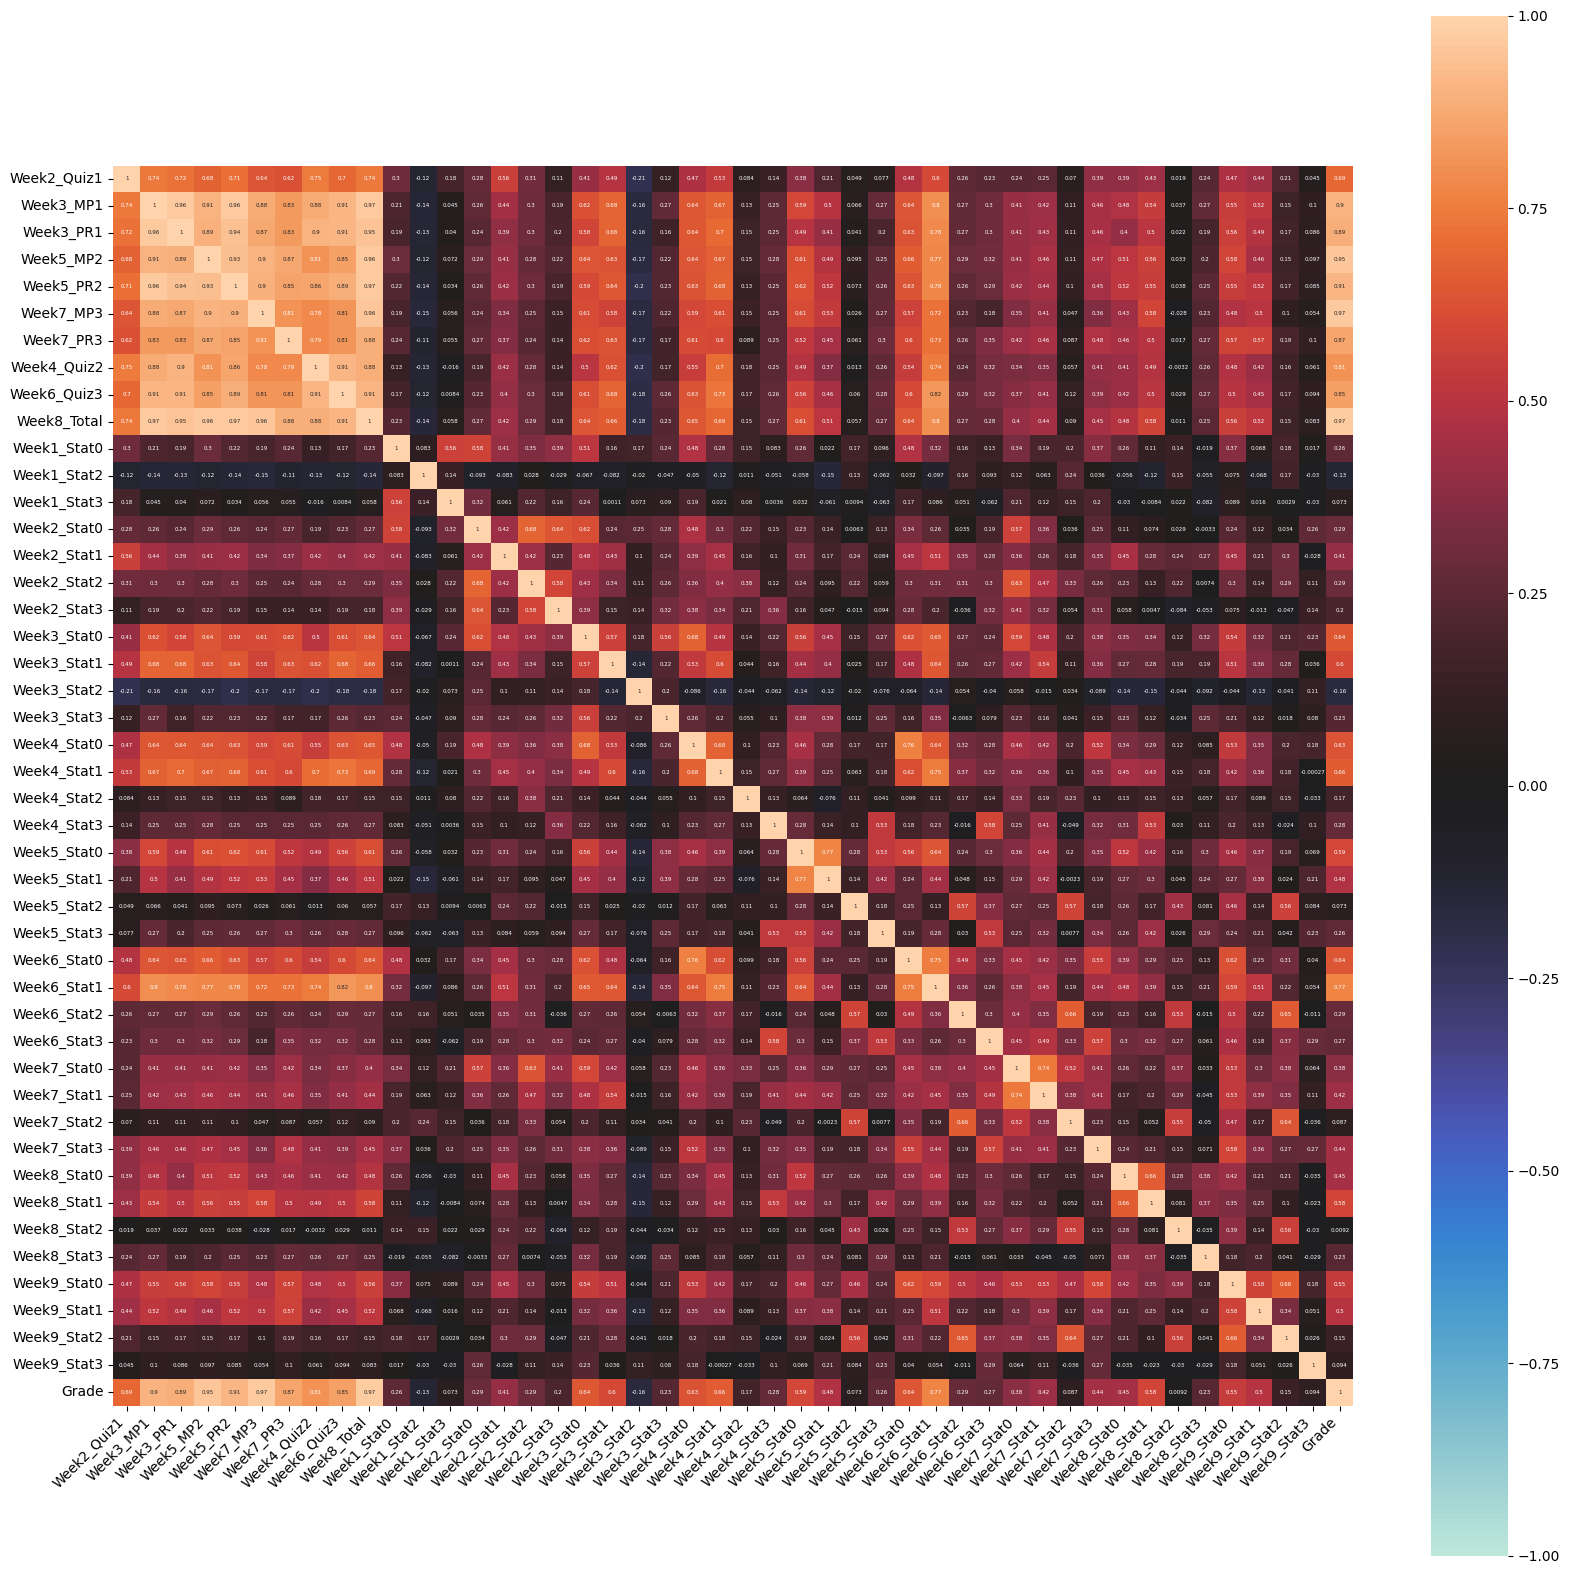

In [58]:
# draw the heatmap of correlation for visualization
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_corr, vmin=-1, vmax=1, center=0, annot=True,square=True, ax=ax, annot_kws={"size": 4})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [59]:
#  Given the heatmap, we should focus on two things
# 1. Remove highly correlated features(objectively),  also known as feature correlation or feature multicollinearity, is a common preprocessing step
# 2. Keeping only highly correlated features(subjectively) with the label (target variable), although it depends on the nature of the data and the goals of the problem.

# With the given domain knowledge, we could tell
# 1. 'Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2','Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3' together, form the Week8_Total probably via polynomial equations
# 2. We cannot tell how the grade is calculated but it should be strongly related to the Week8_Total

# Based on the abovementioned heatmap and domain knowledge, we can should:
# 1. drop columns = ['Week8_Total']
# 2. drop some columns which is not highly correlated features(subjectively) with the label (target variable)

In [60]:
# example:
# set up the threshold for filtering the highly correlated features(subjectively) with the label (target variable)
threshold_corr = 0.5

# Get the columns with abs correlation > 0.5 with the last column ('Grade') for further reference
columns_with_high_corr = df_corr[abs(df_corr['Grade'] > threshold_corr)].index.tolist()

# Keep columns which are more than threshold_corr correlated to the lable values
df = df.loc[:, columns_with_high_corr]

# consider feature multicollinearity, we only drop Week8_Total and keep other features related to scores

df.drop(columns = ['Week8_Total'], inplace = True)

print(df.columns)
# print(f'{np.array(columns_with_high_corr)} are the columns that exhibit correlations with the \'Grade\' column greater than {threshold_corr} in absolute value.')

Index(['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week3_Stat0',
       'Week3_Stat1', 'Week4_Stat0', 'Week4_Stat1', 'Week5_Stat0',
       'Week6_Stat0', 'Week6_Stat1', 'Week8_Stat1', 'Week9_Stat0', 'Grade'],
      dtype='object')


In [61]:
df

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week3_Stat0,Week3_Stat1,Week4_Stat0,Week4_Stat1,Week5_Stat0,Week6_Stat0,Week6_Stat1,Week8_Stat1,Week9_Stat0,Grade
0,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,30,4,14,39,24,28,30,4,8,4
1,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,100,4,130,16,48,57,22,2,25,4
2,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,25,4,50,19,28,14,20,2,9,3
3,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,79,4,240,27,47,99,19,0,7,3
4,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,27,5,6,15,32,22,18,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,13,4,14,16,9,7,11,0,1,0
103,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,10,0,5,0,0,0,0,0,3,0
104,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,9,0,0,0,0,0,0,0,0,0
105,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0,0,0,0,1,0,0,0,6,0


### Model Selection

In [62]:
# import necessary Libs
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import RepeatedStratifiedKFold
# ignore warning
import warnings
warnings.filterwarnings('ignore')

In [63]:
# saperate Features from Lable
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [64]:
# transformation,  chose the MinMaxScaler for numeric features and an OneHotEncode (OHE) for the categorical features.
# in DEA section, we've found that all the features are type of numeric, so we only apply MinMaxScaler on them
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [65]:

# define a model space using dictionary
def get_models():
  names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "GradientBoosting",
    "SGD",
    "Perceptron",
  ]
  classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", random_state=42, class_weight='balanced', C=0.025),
    SVC(gamma=2, C=1, random_state=42, class_weight='balanced'),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=4),
    DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced'),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42, class_weight='balanced'),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(random_state=42),
    SGDClassifier(random_state=42, class_weight='balanced'),
    Perceptron(random_state=42)
  ]
  return dict(zip(names,classifiers))
# employee cross_val_score to get
def get_scores():
  scores = {key: None for key in get_models().keys()}
  cv = RepeatedStratifiedKFold(n_splits=3,
                                 n_repeats=5,
                                 random_state=1)
  for name, claasifier in (get_models().items()):
      scores[name] = cross_val_score(claasifier, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
  return scores


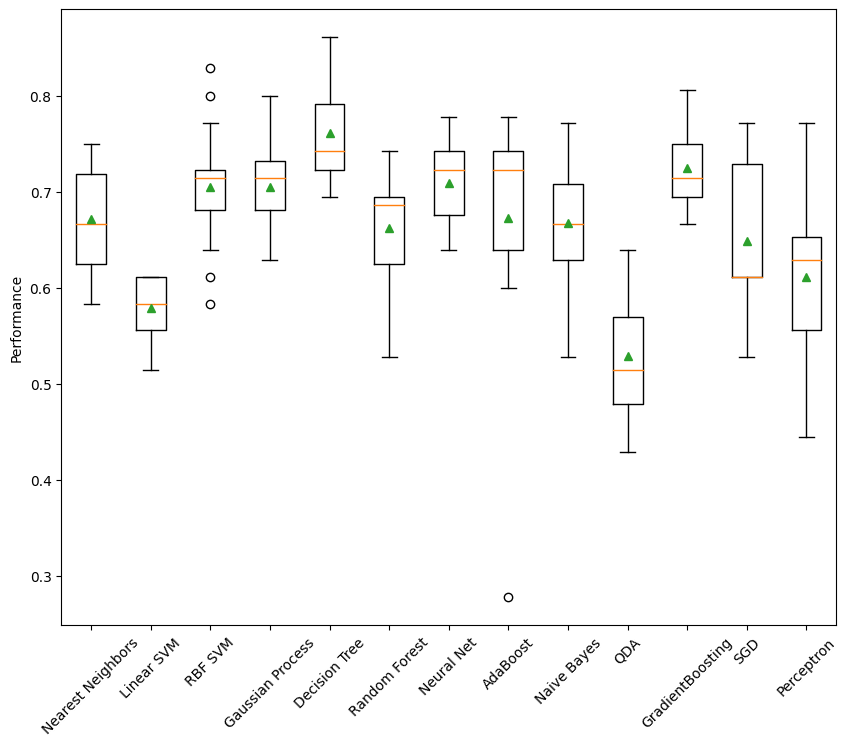

In [66]:
scores = get_scores()
labels = list(scores.keys())
values = list(scores.values())
# plot model performance for comparison
plt.figure(figsize=(10,8))
plt.boxplot(values, labels=labels, showmeans=True)
plt.xticks(rotation=45)
plt.ylabel('Performance')
plt.show()

### Model Chosen and Training
Till now, what we did:
1. Specify our problem to a classification problem in DEA step: Give 47 fetures of a dataset, how can we find a good classifier, to successfully predict the what grade a student will get in  [4 3 2 0 5]
2. drop some features in related to feature multicollinearity and low-correlated features(0.5) with the label (Grade),
3. Test a bounch of classifiers using their default setups, get the corresponding performances(accuracies)

What we do next is gonna select three models to tune the hyper parameters and see whether we can improve the performace to some extend.

We'd like here to choose

1. k-Nearest Neighbors (k-NN): middle-level performace in default setup
2. Decision Tree: Higher performace in default setup
3. Random Forest, an ensemble method that builds upon the foundation of Decision Trees

to observe the impact of fine-tuning hyperparameters on enhancing the model's accuracy.






#### k-NN

##### Baseline model k_NN using all features

In [67]:
# import train_test_split lib
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# separate dataset to X and y
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

# default is 80% / 20% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
from sklearn.neighbors import KNeighborsClassifier
# Check the performance for basic model of k-NN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train.values.ravel())
print('The mean accuracy on the given test data and labels is {}'.format(knn.score(X_test, y_test)))


The mean accuracy on the given test data and labels is 0.5454545454545454


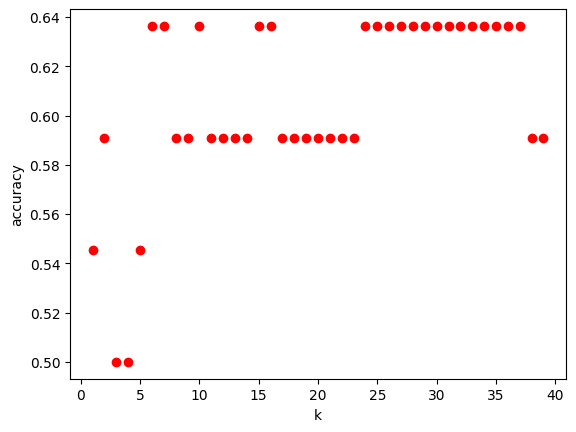

In [69]:
# Examine how the accuracy of k-NN classification varies as fine-tuning the 'k' parameter for all features
k_range = range(1,40)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train.values.ravel())
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores, color='red')
plt.xticks([0,5,10,15,20, 25, 30, 35, 40]);
# the result has lots of bias

##### Hyperparameter Tuning for k-NN


##### Turning using Grid_Search:
Inputs:
1. feature selection based on correlation scores between features and labels
2. K neighbours adjustment

Output:
Best k for different feature combinations

please keep in mind:
1. Larger k= less complex model = can lead to underfitting
2. Smaller k= more complex model = can lead to overfitting


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
# Define a Tunning method using Grid_Search
def tuning_KNN_Grid_Search(threshold_corrs = [0.6,0.7,0.8, 0.9], k_range = range(1,40)):
  # Set up a default classifier
  clf = KNeighborsClassifier()
  # Prepare the conbinations of Hyper Parameters
  param_grid = {
      'n_neighbors': k_range
  }
  # calculate correlations
  df_corr = df.corr()
  # for each threshold, find the satisfied features, use the k_range as the inputs for Grid_Search, in order to get the 'best' K
  for threshold_corr in threshold_corrs:
    # Get the columns with abs correlation > threshold_corr with the last column ('Grade')
    columns_with_high_corr = df_corr[abs(df_corr['Grade'] > threshold_corr)].index.tolist()
    columns_with_high_corr.remove("Grade")
    # print(columns_with_high_corr)
    # feature selections
    df_X_train = X_train[columns_with_high_corr]

    # Set up grid_search and fit the train data
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
    grid_search.fit(df_X_train, y_train)
    # Get the best "k" value from the grid search
    best_k = grid_search.best_params_['n_neighbors']
    # Train a KNN model with the best "k" on the training set
    best_knn = KNeighborsClassifier(n_neighbors=best_k)
    best_knn.fit(df_X_train, y_train)
    # Evaluate the best model on the test set
    df_X_test = X_test[columns_with_high_corr]
    y_pred_gs = best_knn.predict(df_X_test)
    test_accuracy = accuracy_score(y_test, y_pred_gs)
    print(f"Best k: {best_k} for correlation larger than {threshold_corr}")
    print(f"Test Accuracy: {test_accuracy}")

In [71]:
# set up hyperparameters for tuning k-NN using Grid_Search:
# threshold_corrs: list, including feature-label correlation larger than %
threshold_corrs = [0.6,0.7,0.8, 0.9]
# k_range: list, including K nearest neighbours
k_range = range(1,40)

# call tunning function
tuning_KNN_Grid_Search(threshold_corrs, k_range)

Best k: 22 for correlation larger than 0.6
Test Accuracy: 0.5909090909090909
Best k: 2 for correlation larger than 0.7
Test Accuracy: 0.7727272727272727
Best k: 1 for correlation larger than 0.8
Test Accuracy: 0.8636363636363636
Best k: 2 for correlation larger than 0.9
Test Accuracy: 0.8181818181818182


##### Turning using Regular fit and Cross Validation Scores:
Inputs:
1. feature selection based on correlation scores between features and labels
2. K neighbours adjustment
3. mean accuracy thredholds adjustment

Output:
1. Selected Features using different correlations
2. regular training scores, testing score and cross validation scores
3. Suggested K using selected features with required minimum scores for all training, testing and cross validation.

please keep in mind:
1. Larger k= less complex model = can lead to underfitting
2. Smaller k= more complex model = can lead to overfitting

In [72]:
# Define a Tunning method using regular fit and cross_validations
from sklearn.model_selection import cross_val_score
def tuning_KNN(threshold_corrs = [0.6,0.7,0.8, 0.9], k_range = range(1,40), thres_score = 0.95):
  df_corr = df.corr()
  i = 1
  fig = plt.figure(figsize=(15,4))

  df_possible_solution = pd.DataFrame(columns = ["K", "Feature_Correlation", "Training_Score", "Testing_Score", "Cross_vaalidation_Score_Mean"] )
  df_feature_group = pd.DataFrame(columns = [ "Feature_Correlation", "Selected_Feature"] )

# for each difference features selection with specific corr score
  for threshold_corr in threshold_corrs:
    # Get the columns with abs correlation > threshold_corr with the last column ('Grade')
    columns_with_high_corr = df_corr[abs(df_corr['Grade'] > threshold_corr)].index.tolist()
    # Drop columns not in the columns_to_drop
    columns_to_drop = [col for col in df.columns if col not in columns_with_high_corr]
    X_train_temp = X_train.drop(columns=columns_to_drop)
    X_test_temp = X_test.drop(columns=columns_to_drop)
    df_feature_group = df_feature_group.append({
                    'Feature_Correlation': threshold_corr,
                    'Selected_Feature': columns_with_high_corr,
                    }, ignore_index=True)
    # print(f'{columns_with_high_corr} \n are the columns that exhibit correlations with the \'Grade\' column greater than {threshold_corr} in absolute value.')
    # Examine how the accuracy of k-NN classification varies as fine-tuning the 'k' parameter.
    train_scores = []
    test_scores = []
    cv_scores = []
    # get the score for train and test data using k-NN
    for k in k_range:
        # get cross validations scores for training data
        clf_knn = KNeighborsClassifier(n_neighbors = k)
        cv_score_mean = np.mean(cross_val_score(clf_knn, X_train_temp, y_train.values.ravel()))
        # get regular model scores for training data and testing data
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train_temp, y_train.values.ravel())
        train_score = knn.score(X_train_temp, y_train)
        test_score = knn.score(X_test_temp, y_test)
        if (train_score >thres_score and test_score>thres_score and cv_score_mean > thres_score):
          df_possible_solution = df_possible_solution.append({'K': k,
                    'Feature_Correlation': threshold_corr,
                    'Training_Score': train_score,
                    'Testing_Score': test_score,
                    'Cross_vaalidation_Score_Mean': cv_score_mean,
                    }, ignore_index=True)
          # print('Find: ' + str(k) + ' neighbours with selected features which have more than ' + str(threshold_corr) + ' feture-lable correlation, could be a good choice: training score is ' + str(train_score) + ' testing score is: ' + str(test_score) + '5 fold cross validation mean score is: '+ str(cv_score_mean))

        train_scores.append(train_score)
        test_scores.append(test_score)
        cv_scores.append(cv_score_mean)

    ax = fig.add_subplot(1, len(threshold_corrs), i)
    ax.set_xlabel('k Neighbors with ' + str(len(columns_with_high_corr)-1) + ' features')
    ax.set_ylabel('accuracy')
    ax.scatter(k_range, train_scores, color = 'red', label = 'train score')
    ax.scatter(k_range, test_scores, color = 'blue', label = 'test score')
    ax.scatter(k_range, cv_scores, color = 'green', label = 'cv_train score')
    ax.set_xticks([0,5,10,15,20, 25, 30, 35, 40])
    ax.legend()
    i += 1
  # Adjust spacing between subplots
  plt.tight_layout()
  plt.show()
  return (df_possible_solution, df_feature_group)

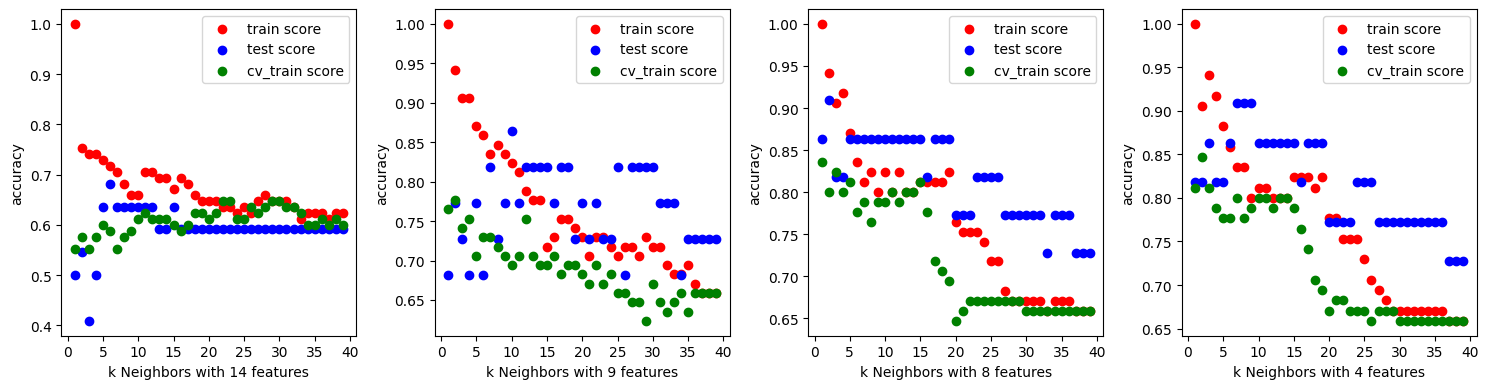

In [73]:
# set up hyperparameters for tuning k-NN using regular fit and cross_validations_scores:
# threshold_corrs: list, including feature-label correlation larger than %
threshold_corrs = [0.6,0.7,0.8, 0.9]
# k_range: list, including K nearest neighbours
k_range = range(1,40)
# Setting up thresholds for score train_score, test_score and cross validation score
thres_score = 0.8
# call tunning function
df_possible_solution, df_feature_group = tuning_KNN(threshold_corrs, k_range, thres_score)

In [74]:
# Check the selected Features
df_feature_group

,Feature_Correlation,Selected_Feature
0,0.6,"[Week2_Quiz1, Week3_MP1, Week3_PR1, Week5_MP2,..."
1,0.7,"[Week3_MP1, Week3_PR1, Week5_MP2, Week5_PR2, W..."
2,0.8,"[Week3_MP1, Week3_PR1, Week5_MP2, Week5_PR2, W..."
3,0.9,"[Week3_MP1, Week5_MP2, Week5_PR2, Week7_MP3, G..."


In [75]:
# Check the possible solution for k-NN
df_possible_solution

,K,Feature_Correlation,Training_Score,Testing_Score,Cross_vaalidation_Score_Mean
0,1.0,0.8,1.000000,0.863636,0.835294
1,3.0,0.8,0.905882,0.818182,0.823529
2,5.0,0.8,0.870588,0.863636,0.811765
3,15.0,0.8,0.811765,0.863636,0.811765
4,1.0,0.9,1.000000,0.818182,0.811765
5,2.0,0.9,0.905882,0.818182,0.847059
6,3.0,0.9,0.941176,0.863636,0.811765


#### Decision Tree

##### Using Grade Search for finding the best parameters

In [76]:
# We continusly use selected Features mentioned in "Data Preprocessing and Feature Selections" section as the baseline
# We transfer labels data type from int to string
df['Grade'] = df['Grade'].astype(str)

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# import train_test_split lib
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# separate dataset to X and y
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

# default is 80% / 20% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# Set up a default classifier
clf = DecisionTreeClassifier()
# Prepare the conbinations of Hyper Parameters
param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, "balanced"]
}
# Set up grid_search and fit the train data
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
# get the best_params
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'class_weight': None, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [79]:
# use the best hyper parameters to build a classifier
best_tree = DecisionTreeClassifier(**best_params)
# fit the train data
best_tree.fit(X_train, y_train)
# get the evaluation for test data
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(best_tree.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(best_tree.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.68


##### Visulize Decision Tree and rank the importance of features

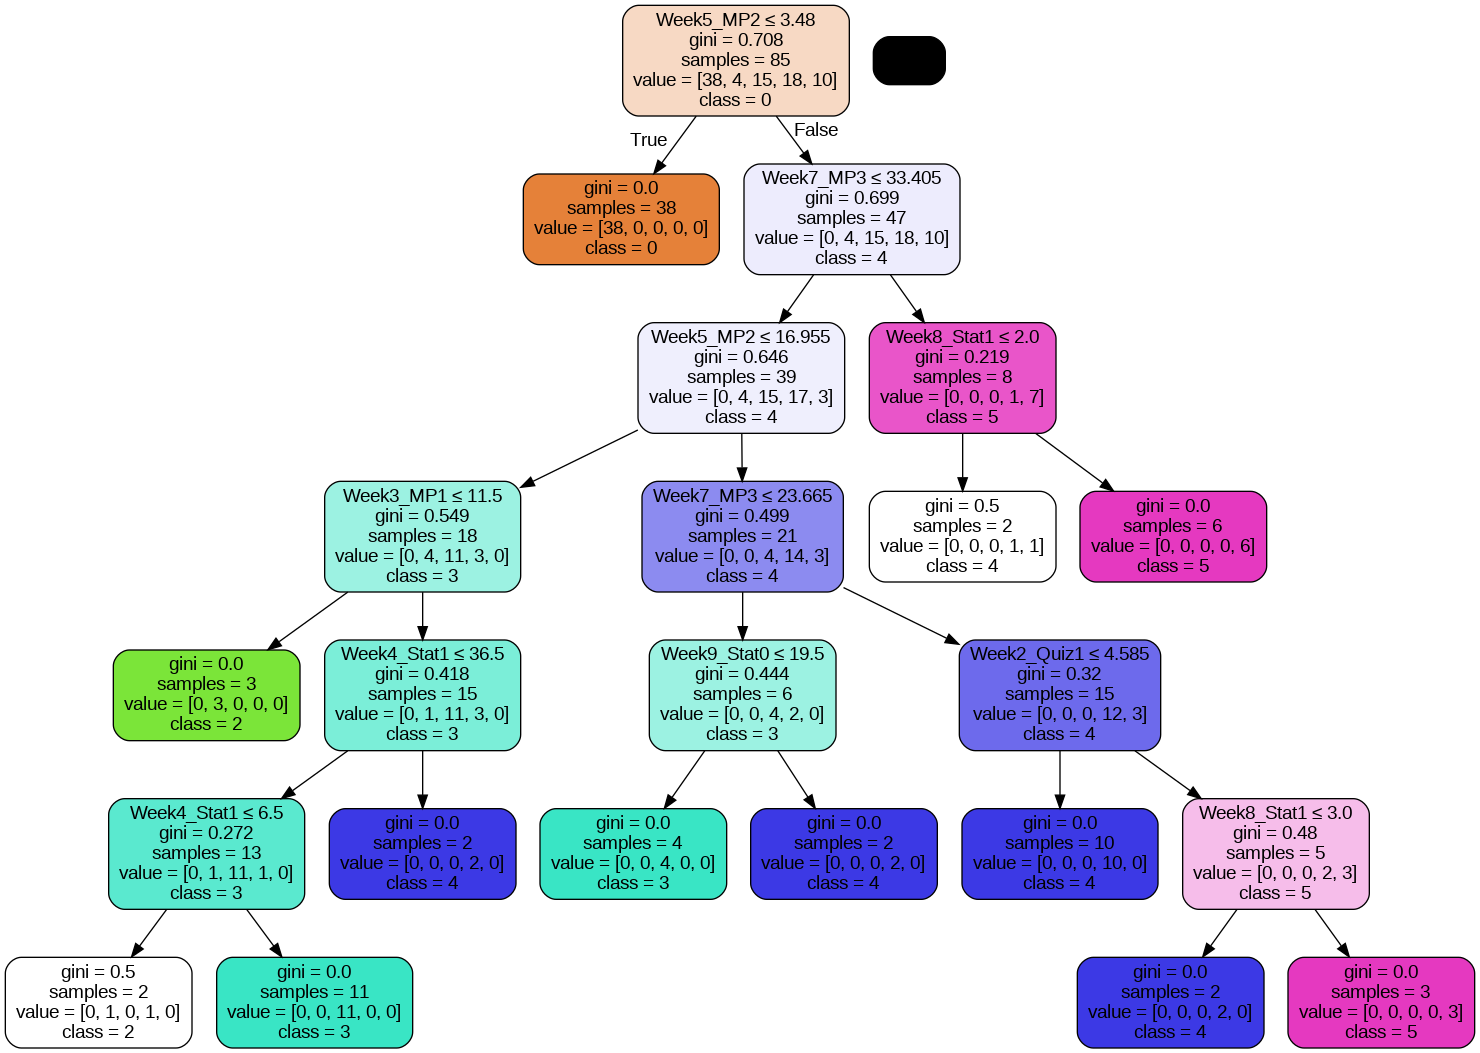

In [80]:
# Draw the Decision Tree Graph with the same classifier clf: max_depth=5, random_state=42, class_weight='balanced'
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
feature_names = X.columns.tolist()
class_names=y['Grade'].unique()
class_names.sort()
export_graphviz(best_tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names, class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('result.png')
Image(graph.create_png())

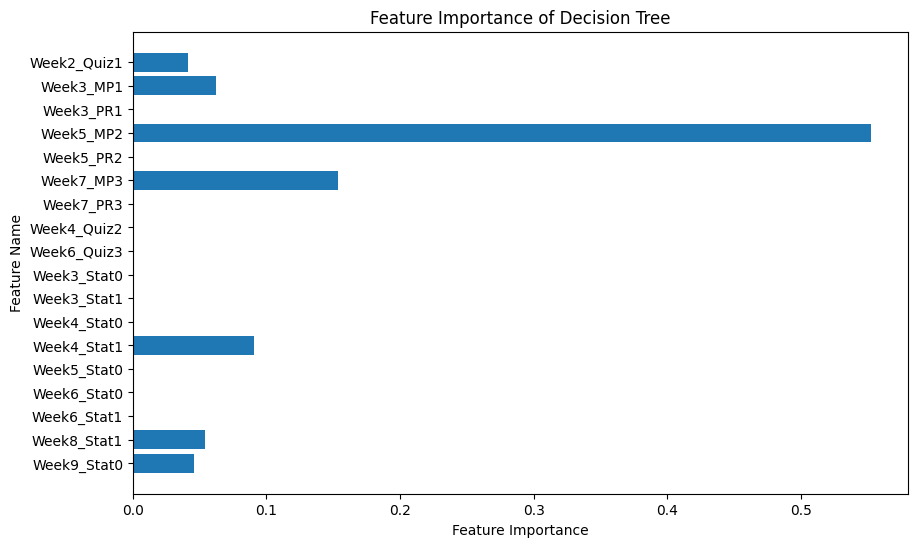

In [81]:
# Get feature importances
feature_importances = best_tree.feature_importances_
# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance of Decision Tree')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()


#### Random Forest

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# separate dataset to X and y
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

# default is 80% / 20% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Grid Search for best Hyper Parameters

In [83]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
}

# Create a grid search object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a Random Forest classifier with the best hyperparameters on the entire training dataset
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

# get the evaluation for both test and train data
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(best_rf_classifier.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(best_rf_classifier.score(X_test, y_test)))


Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.82


In [84]:
#Save Trees in the Forest as pngs from dots
import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree
dotfile = six.StringIO()
feature_names = X.columns.tolist()
i_tree = 0
class_names=y['Grade'].unique()
class_names.sort()

# looping 100 estimateors, 100 is the best search result given by the grid search
for tree_in_forest in best_rf_classifier.estimators_:
    export_graphviz(
        tree_in_forest,
        out_file=f'tree_{i_tree}.dot',
        feature_names=feature_names,
        filled=True,
        rounded=True,
        class_names = class_names
    )

    # Convert the DOT file to a PNG image
    (graph,) = pydot.graph_from_dot_file(f'tree_{i_tree}.dot')
    graph.write_png(f'tree_{i_tree}.png')

    # Increment the tree counter
    i_tree += 1


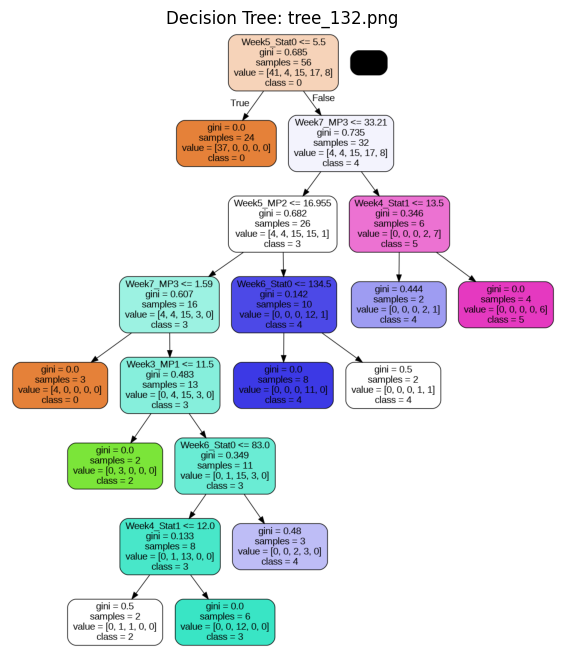

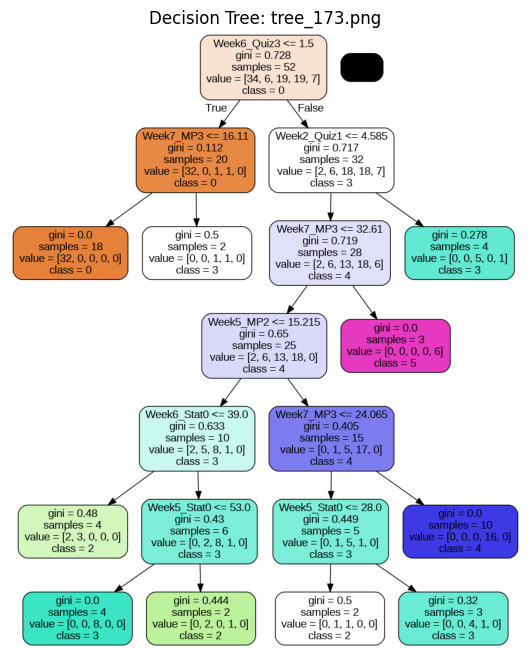

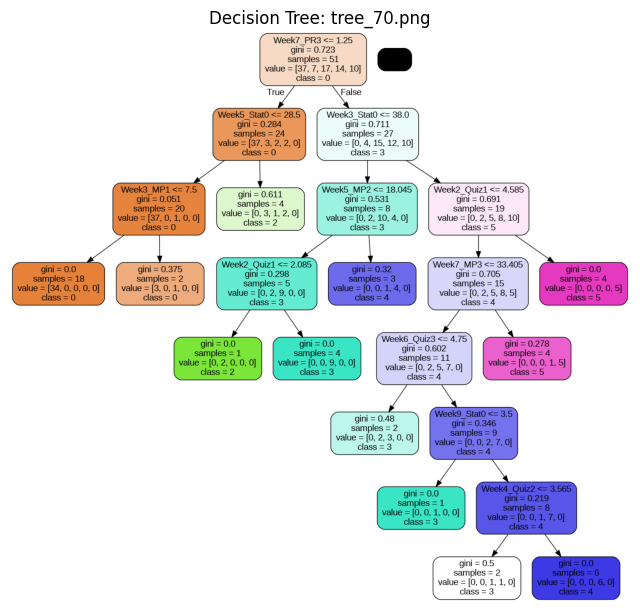

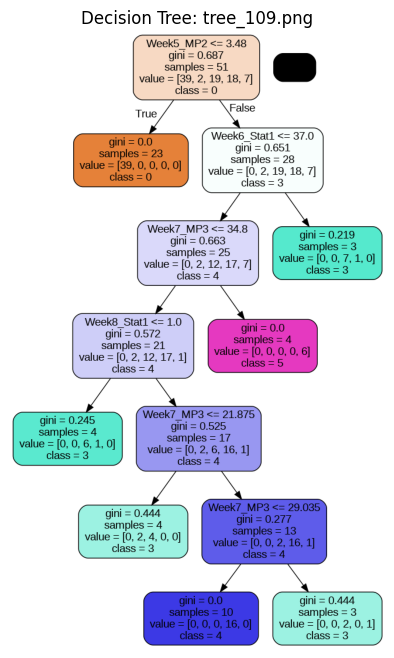

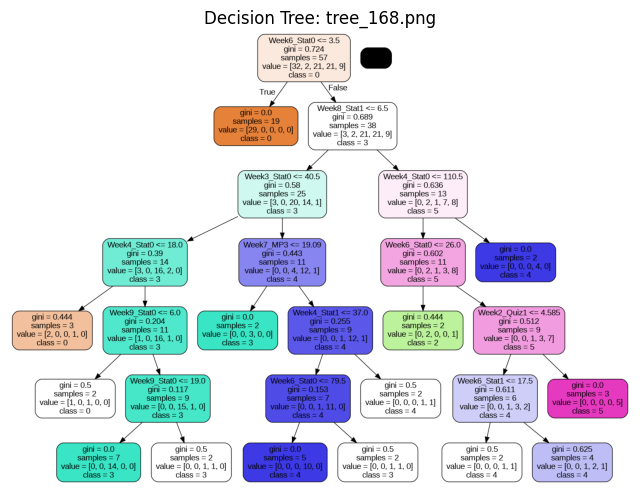

In [85]:
# Assuming you have saved the tree PNG images in the current directory
import glob
import random
image_files = glob.glob('tree_*.png')

# Generate 5 random numbers between 1 and 100
random_numbers = [random.randint(0, 99) for _ in range(5)]
i = 0

# Display each image using matplotlib with 5 random selected pictures
for image_file in image_files:
    if i in random_numbers:
      image = plt.imread(image_file)
      plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
      plt.imshow(image)
      plt.title(f"Decision Tree: {image_file}")
      plt.axis('off')  # Turn off the axis labels
      plt.show()
    i+=1

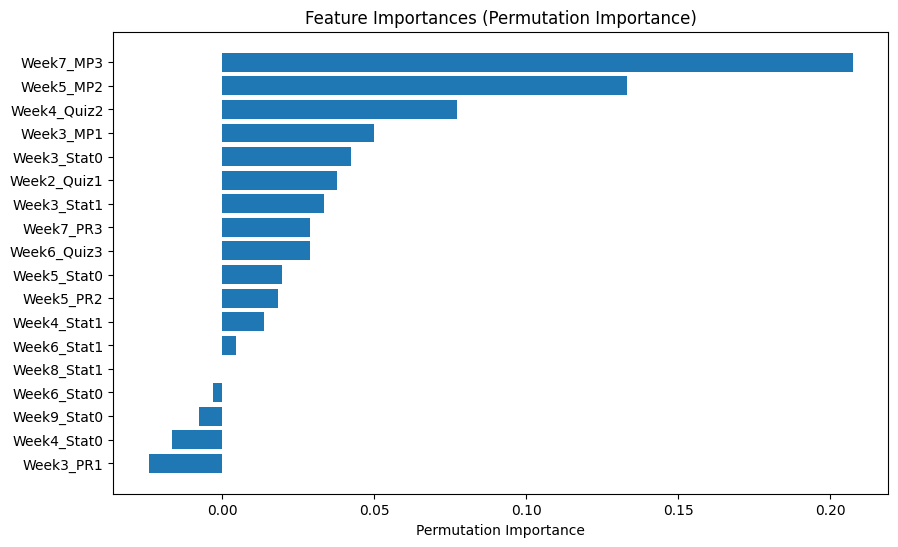

In [86]:
# Calculate feature importances using permutation feature importance
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_rf_classifier, X_test, y_test, n_repeats=30, random_state=42)

# Get the feature importances
feature_importances = perm_importance.importances_mean

# Get the feature names (assuming you have feature names available)
feature_names = X.columns.tolist()

# Sort feature importances and feature names by importance
sorted_idx = np.argsort(feature_importances)
feature_importances_sorted = feature_importances[sorted_idx]
feature_importances_sorted
feature_names_sorted = np.array(feature_names)[sorted_idx]
# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), feature_importances_sorted, align="center")
plt.yticks(range(X.shape[1]), feature_names_sorted)
plt.xlabel("Permutation Importance")
plt.title("Feature Importances (Permutation Importance)")
plt.show()
